This is where I am going to write out my code for this project.

Louisville Animal Shelter Data: https://data.louisvilleky.gov/datasets/louisville-metro-ky-animal-service-intake-and-outcome/about
Nationwide Animal Shelter Data: https://www.shelteranimalscount.org/data-request-free-download/
Dallas Animal Shelter Data: https://www.dallasopendata.com/Services/Dallas-Animal-Shelter-Data-Fiscal-Year-2022-2023/f77p-sgrc/about_data


In [ ]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
pip install pandas openpyxl

In [ ]:
df = pd.read_csv('Animal_IO_Data.csv')
df['indate'] = pd.to_datetime(df['indate'], errors='coerce')
df = df[df['indate'].dt.year == 2022]

print(df)

Want to import another city's data, to have a closer comparison.  I was seeing an erorr with the data before importing, so I did research and found the "usecols" function.

In [ ]:
columns_to_include = ['Animal Type', 'Animal Breed', 'Intake Type', 'Intake Subtype', 'Intake Date', 'Outcome Type', 'Outcome Subtype', 'Month', 'Year']
df3 = pd.read_csv('Dallas_Animal_Shelter_Data_Fiscal_Year_2022_-_2023.csv', usecols=columns_to_include)
df3['Intake Date'] = pd.to_datetime(df3['Intake Date'], errors='coerce')
df3 = df3[df3['Intake Date'].dt.year == 2022]
print(df3)

In [ ]:
df2 = pd.read_excel('3 year 21-22-23 SAC Agg.xlsx')
df2.drop(columns=['Organizations'], inplace=True)
for col in df2.columns:
    print(col)
df2.dtypes
df2 = df2[df2['Year'] == 2022]
df2.reset_index(drop=True, inplace=True)
df2 = df2[df2['State'].isin(['KY', 'TX'])]  

In [ ]:
print(df2)

In [ ]:
pattern_of_intake = 'Intake'
pattern_of_outcome = 'Outcome'
intake_columns = [col for col in df2.columns if pattern_of_intake in col]
outcome_columns = [col for col in df2.columns if pattern_of_outcome in col]
df2['Total_Intakes'] = df2[intake_columns].sum(axis=1)
df2['Total_Outcomes'] = df2[outcome_columns].sum(axis=1)
print(df2[['State', 'Total_Intakes', 'Total_Outcomes']])

In [ ]:
df.drop(columns=['kennel', 'animalid', 'jurisdiction', 'sex', 'color', 'breed', 'sourcezipcode', 'ObjectId'], inplace=True)
df = df.dropna()
print (df)

In [ ]:
df['indate'] = pd.to_datetime(df['indate'])
df_remove =df[~df['indate'].dt.year.isin([2024, 2025])]
df['outdate'] = pd.to_datetime(df['outdate'])
df_remove =df[~df['outdate'].dt.year.isin([2024, 2025])]
print(df)

I am going to combine all the intake columns into one, and do the same for the outtake columns.  I did use AI to help with this.


In [ ]:
intake_columns = [col for col in df2.columns if 'Intake' in col]
df2['Combined_National_Intake'] = df2[intake_columns].sum(axis=1)
outtake_columns = [col for col in df2.columns if 'Outcome' in col]
df2['Combined_National_Outcome'] = df2[outtake_columns].sum(axis=1)
print(df2)

In [ ]:
df2_grouping = df2.groupby('State' , as_index=False)['Combined_National_Intake'].sum()
df2_grouping2 = df2.groupby('State' , as_index=False)['Combined_National_Outcome'].sum()
df2_grouped = pd.merge(df2_grouping, df2_grouping2, on='State')
print("Grouped by state and sum total:")
print(df2_grouped)

In [ ]:
df = df.reset_index(drop=True)
df3 = df3.reset_index(drop=True)
merged_df = pd.concat([df, df3], axis=1)

df.columns = ['Louisville_' + col for col in df.columns]
df3.columns = ['Dallas_' + col for col in df3.columns]

merged_df = pd.concat([df, df3], axis=1)

print(merged_df)

combined_df = pd.concat([df, df3], axis=0, ignore_index=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(combined_df)

combined_df_filled = combined_df.fillna("")
print(combined_df_filled)

In [ ]:
merged_df.to_csv('combined_data7.csv', index=False)

In [ ]:
louisville_animal_count = merged_df['Louisville_animaltype'].value_counts()
dallas_animal_count = merged_df['Dallas_Animal Type'].value_counts()
print("Louisville Animal Type Counts:")
print(louisville_animal_count)
print("\nDallas Animal Type Counts:")
print(dallas_animal_count)


In [ ]:
louisville_mode = merged_df['Louisville_animaltype'].mode()[0]
dallas_mode = merged_df['Dallas_Animal Type'].mode()[0]

print(f"Most common Louisville Animal Type: {louisville_mode}")
print(f"Most common Dallas Animal Type: {dallas_mode}")

In [ ]:
print("Louisville Animal Type Counts:")
print(louisville_animal_count)
print("\nDallas Animal Type Counts:")
print(dallas_animal_count)

In [ ]:
import matplotlib.pyplot as plt
louisville_animal_count = merged_df['Louisville_animaltype'].value_counts()
dallas_animal_count = merged_df['Dallas_Animal Type'].value_counts()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
patches, texts = ax1.pie(
    louisville_animal_count, 
    autopct= None, 
    startangle=90,
    colors=plt.cm.Paired.colors,
    labels=None
)
ax1.set_title('Animal Types in Louisville for 2022-2023')
ax1.legend(patches, louisville_animal_count.index, title="Animal Intake/Outtake Tyoes", loc="upper left", bbox_to_anchor=(0,0))
ax1.axis('equal') 
patches2, texts2 = ax2.pie(
    dallas_animal_count, 
    autopct= None, 
    startangle=90,
    colors=plt.cm.Paired.colors, 
    labels=None
)
ax2.set_title('Animal Types in Dallas for 2022-2023')
ax2.legend(patches, dallas_animal_count.index, title="Animal Intake/Outtake Tyoes", loc="upper left", bbox_to_anchor=(0,0))
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
louisville_outcome_count = merged_df['Louisville_outtype'].value_counts()
dallas_outcome_count = merged_df['Dallas_Outcome Type'].value_counts()
print("Louisville Outcome Counts:")
print(louisville_outcome_count)
print("\nDallas Outcome Counts:")
print(dallas_outcome_count)

In [ ]:
louisville_total = louisville_outcome_count.sum()
dallas_total = dallas_outcome_count.sum()
louisville_percentage = (louisville_outcome_count / louisville_total) * 100
dallas_percentage = (dallas_outcome_count / dallas_total) * 100
print ("Louisville Outcome Percentages of Total:")
print(louisville_percentage)
print ("Dallas Outcome Percentages of Total:")
print(dallas_percentage)

This code below took a lot of research and tweaking.  It may seem repetitive, but I finally got it to work to my satisfaction!

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].bar(louisville_percentage.index, louisville_percentage, color='blue')
axes[0].set_title("Louisville Outcome Percentages:")
axes[0].set_xticks(range(len(louisville_percentage.index)))  
axes[0].set_xticklabels(louisville_percentage.index, rotation=45, ha='right')
axes[0].set_ylim(0, 50)
axes[0].set_ylabel("Percentage")
axes[0].tick_params(axis='y', which='both', labelleft=True)
axes[1].bar(dallas_percentage.index, dallas_percentage, color='red')
axes[1].set_title("Dallas Outcome Percentages:")
axes[1].set_xticks(range(len(dallas_percentage.index)))  
axes[1].set_xticklabels(dallas_percentage.index, rotation=45, ha='right')
axes[1].set_ylim(0, 50)
axes[1].set_ylabel("Percentage")
axes[1].tick_params(axis='y', which='both', labelleft=True)

plt.tight_layout
plt.show()


Now I want to create a visual that shows the amount of each set of data and their outcomes.  This is where I want to include the nationwide numbers just to compare

In [ ]:
print(merged_df)

In [ ]:
count = merged_df['Louisville_intype'].count()
print("Total of Louisville intakes in 2022:  ", count)

merged_df['Dallas_Intake Date'] = pd.to_datetime(merged_df['Dallas_Intake Date'], errors='coerce')
count2 = merged_df['Dallas_Intake Type'].count()
print("Total of Dallas intakes in 2022:  ", count2)

print(df2_grouped)

Now I want to compare the amount of intakes to each state (Louisville to KY, Dallas to TX)

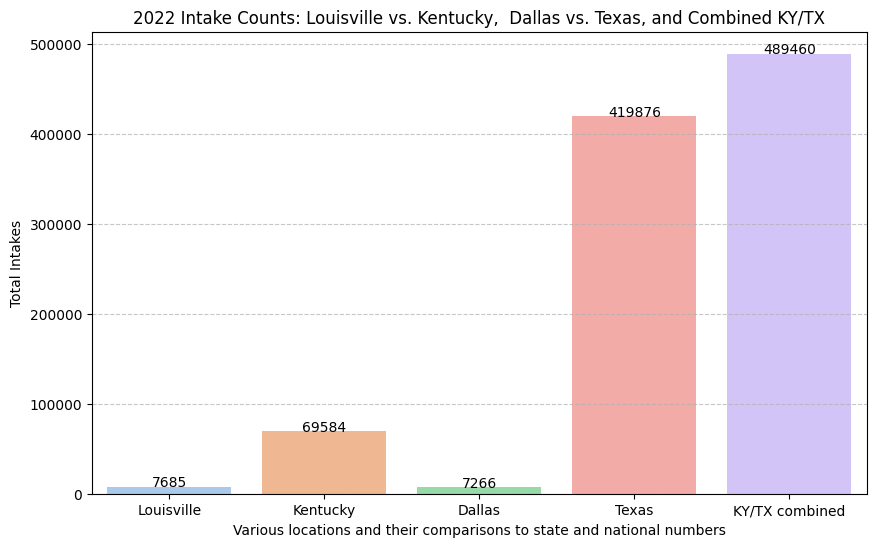

In [33]:
state_intakes = df2_grouped.set_index('State')['Combined_National_Intake']

louisville_intake = merged_df['Louisville_intype'].count()
dallas_intake = merged_df['Dallas_Intake Type'].count()
ky_intake = state_intakes.get('KY', 0)
tx_intake = state_intakes.get('TX', 0)

national_intake = df2_grouped['Combined_National_Intake'].sum()

labels = ['Louisville', 'Kentucky', 'Dallas', 'Texas', 'KY/TX combined']
values = [louisville_intake, ky_intake, dallas_intake, tx_intake, national_intake]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, hue=labels, palette='pastel', legend=False)

plt.title("2022 Intake Counts: Louisville vs. Kentucky,  Dallas vs. Texas, and Combined KY/TX")
plt.xlabel("Various locations and their comparisons to state and national numbers")
plt.ylabel("Total Intakes")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(values):
    plt.text(i, v + 100, str(v), ha='center', fontsize=10)

plt.show()
